## Analyse the Extracted Samples

In [1]:
# import necessary modules

import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import warnings
import tqdm
import pandas as pd
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib as mlp
mlp.rc("xtick",labelsize=12)
mlp.rc("ytick",labelsize=12)
mlp.rc("axes",labelsize=14)
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.dpi"] = 100

CURR_DIR = os.getcwd()

In [2]:
# make necessary definitions

MAIN_DIR = os.path.join(CURR_DIR,"..")
DATA_DIR = os.path.join(MAIN_DIR,"dataset")
FIG_DIR = os.path.join(MAIN_DIR,"figures")
# os.makedirs(FIG_DIR,exist_ok=True)

SPEAKER = ["RL","RN","SR","US"]
MODE = ["mentally","mouthed","audible"]
WORDS = ["add","call","go","later","left","reply","right","stop","subtract","you"]

# a function to save plotted figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(FIG_DIR, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
all_files = glob.glob(DATA_DIR+"/*/*/*/*.txt",recursive=True)
print(len(all_files))

30


In [18]:
def parser(files):
    """
    parser function to extract utterances from .txt file and store them in a dictionary
    """
    dataset = {"data":[], "speaker":[], "mode":[], "utter_type":[]}
    def get_data(file):
        mode = file.split("/")[-2]
        utter_type = file.split("/")[-3]
        speaker = file.split("/")[-4]
        f = open(file, 'r')
        contents = map(lambda x : x.strip(), f.readlines())
        #the file starts with '%' and some instruction before data and removing these data 
        frames_original = list(filter(lambda x : x and x[0] != '%', contents))[1:]
        #the data row contains channels info digital trigger and accelerometer info separated by comma
        frames_original = list(map(lambda s : list(map( lambda ss: ss.strip(), s.split(','))), frames_original))
        # (8 channels) + digital triggers
        # the digital trigger is in a[16], used to indicate the utterance
        frames = list(map(lambda a: list(map(float, a[1:9])) + [float(a[16])] , frames_original))
        frames = np.array(frames)
        indices = []
        signal = []
        for index,f in enumerate(frames[:,-1]):
            if(bool(f) ^ bool(frames[(index+1) if ((index+1)<len(frames)) else index,-1]) ):
                indices.append(index)
                if len(indices)>1 and len(indices)%2==0:
                    signal.append(frames[indices[len(indices)-2]:indices[len(indices)-1],:-1])   
        
        dataset["data"].extend(signal)
        dataset["speaker"].extend([speaker]*len(signal))
        dataset["mode"].extend([mode]*len(signal))
        dataset["utter_type"].extend([utter_type]*len(signal))
        
    for file,i in zip(files,tqdm.tqdm(range(1,len(files)+1),desc="PARSING DATA")):
        get_data(file)
    
    return dataset

In [19]:
all_data = parser(all_files)

PARSING DATA:  97%|█████████▋| 29/30 [00:22<00:00,  1.28it/s]


In [11]:
len(all_data["data"])

1001

In [22]:
df = pd.DataFrame(all_data)

In [27]:
df.tail(10)

,data,speaker,mode,utter_type
991,"[[-32714.4140625, 10723.3388671875, 4756.13818...",RL,audible,sentences
992,"[[-32534.236328125, 11022.583984375, 4942.7304...",RL,audible,sentences
993,"[[-32396.70703125, 10771.484375, 4783.51904296...",RL,audible,sentences
994,"[[-32638.552734375, 10867.373046875, 4700.6162...",RL,audible,sentences
995,"[[-32674.830078125, 10714.7109375, 4751.600585...",RL,audible,sentences
996,"[[-32795.03515625, 10849.2900390625, 4730.5454...",RL,audible,sentences
997,"[[-32504.017578125, 10832.080078125, 4712.8876...",RL,audible,sentences
998,"[[-32372.0078125, 10941.0224609375, 4748.47167...",RL,audible,sentences
999,"[[-32453.435546875, 10586.43359375, 4708.28320...",RL,audible,sentences
1000,"[[-32498.8984375, 10701.5009765625, 4575.44677...",RL,audible,sentences


In [26]:
df.head(10)

,data,speaker,mode,utter_type
0,"[[-62088.47265625, 8927.107421875, 16525.11328...",RL,mentally,words
1,"[[-62125.015625, 8909.94140625, 16323.9921875,...",RL,mentally,words
2,"[[-62015.046875, 9002.5673828125, 16309.396484...",RL,mentally,words
3,"[[-62084.0703125, 9221.1220703125, 16322.80761...",RL,mentally,words
4,"[[-62110.109375, 8938.3056640625, 16344.891601...",RL,mentally,words
5,"[[-62127.140625, 9208.2255859375, 16367.109375...",RL,mentally,words
6,"[[-62093.27734375, 8940.0712890625, 16214.3798...",RL,mentally,words
7,"[[-62175.578125, 8816.82421875, 16207.71875, 7...",RL,mentally,words
8,"[[-62131.56640625, 8822.0771484375, 16170.1005...",RL,mentally,words
9,"[[-62099.11328125, 8658.6181640625, 16155.3710...",RL,mentally,words


In [51]:
all_words = df[df["utter_type"]=="words"]
all_sentences = df[df["utter_type"]=="sentences"]
all_word_length = [x.shape[0] for x in all_words["data"]]
all_sent_length = [x.shape[0] for x in all_sentences["data"]]

In [49]:
# all_length

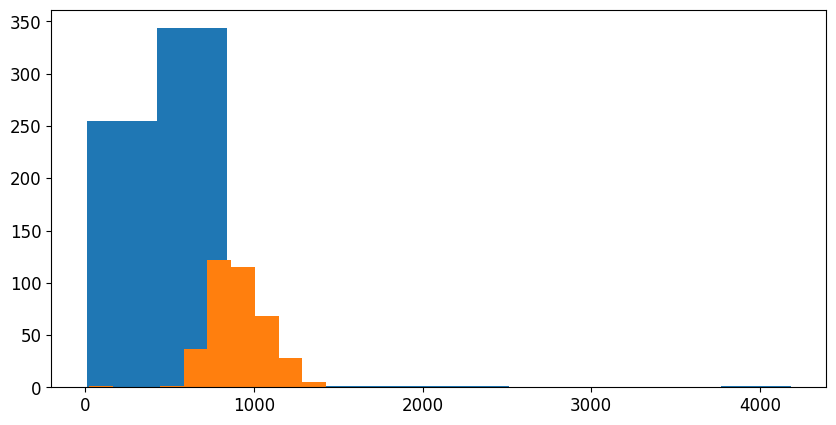

In [52]:
plt.hist(all_word_length)
plt.hist(all_sent_length)
plt.show()

In [35]:
sample = np.transpose(all_data["data"][1])
print(all_data["speaker"][1])
print(all_data["mode"][1])
print(sample.shape)

RL
mentally
(8, 700)


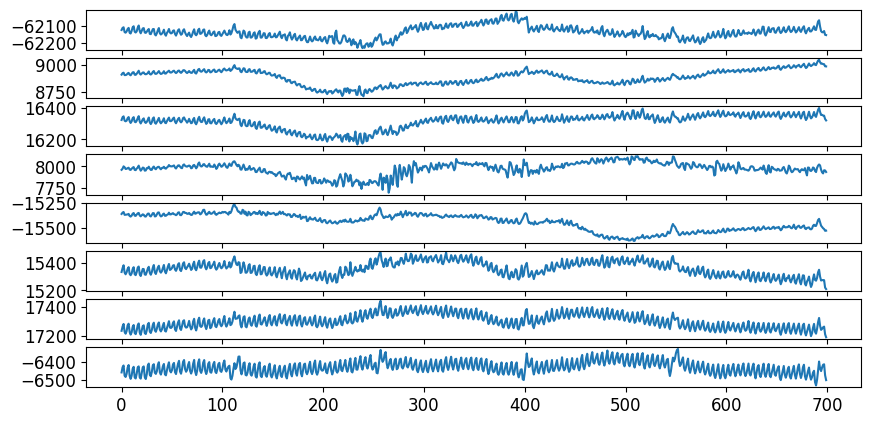

In [36]:
fig, axes = plt.subplots(nrows=8,ncols=1)
for i in range(8):
    axes[i].plot(sample[i])
plt.show()

<class 'list'>


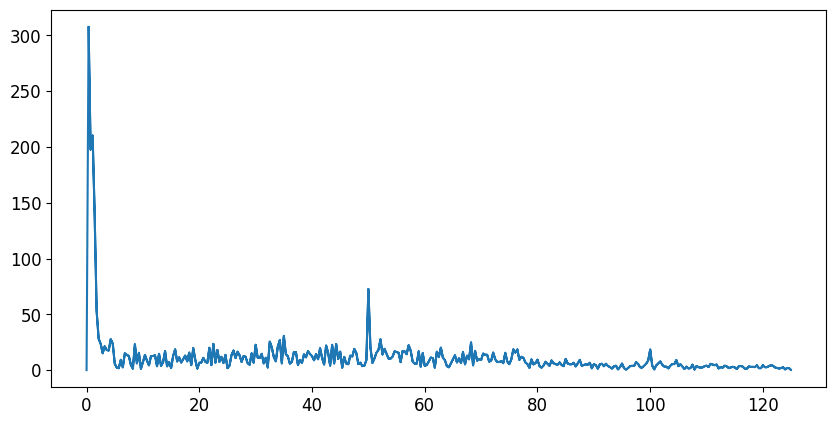

In [39]:
from scipy.fft import fft,fftfreq
from scipy.fftpack import fft
from scipy.stats import zscore
sample = np.transpose(sample)
N = len(sample[:,3])
y = fft(zscore(sample[:,3]))
x = fftfreq(N,1/250)

print(type(plt.plot(abs(x),abs(y))))
plt.show()